# Mean Variance Optimization

- Import data and annualize the mea of monthly returns as well as the volatility of monthly returns with a scaling of $\sqrt(12)$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import matplotlib as mpl
import seaborn as sns
import scipy as scs
import math


In [2]:
plt.style.use("seaborn")
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
file_path = "C:/Users/dcste/OneDrive/Portfolio_Theory/multi_asset_etf_data.xlsx"
description = pd.read_excel(file_path,sheet_name = "descriptions")
description

,ticker,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
0,SPY,SPDR S&P 500,ETF,USD,101107853,358229114880,The Trust seeks to achieve its investment obje...
1,EFA,iShares MSCI EAFE ETF,ETF,USD,33352872,43798241280,The fund generally will invest at least 80% of...
2,EEM,iShares MSCI Emerging Index Fun,ETF,USD,47539498,25870192640,The fund generally will invest at least 80% of...
3,PSP,Invesco Global Listed Private E,ETF,USD,120371,171932880,The fund generally will invest at least 90% of...
4,QAI,IQ Hedge MultiIQ Hedge Multi-St,ETF,USD,138713,707315584,"The fund is a ""fund of funds"" which means it i..."
5,HYG,iShares iBoxx $ High Yield Corp,ETF,USD,48935762,12276870144,The underlying index is a rules-based index co...
6,DBC,Invesco DB Commodity Index Trac,ETF,USD,2314311,3708376064,The fund pursues its investment objective by i...
7,IYR,iShares U.S. Real Estate ETF,ETF,USD,12097258,4077254400,The fund seeks to track the investment results...
8,IEF,iShares 7-10 Year Treasury Bond,ETF,USD,7992450,23017226240,The underlying index measures the performance ...
9,BWX,SPDR Bloomberg International Tr,ETF,USD,369873,809217792,"The fund generally invests substantially all, ..."


In [4]:
total_return = pd.read_excel(file_path, sheet_name = "total returns")
total_return = total_return.set_index("Date")
total_return = total_return.drop("SHV", axis = 1)



In [5]:
total_return.columns = ["International Treasury ETF", "Commodity Index", "Emerging", "MSCI EAFE","High Yield Index", "7-10 Year Treasury Bond","U.S. Real Estate","Private Equity","MultiStrat HedgeFund","SPY","TIPS"]
total_return

,International Treasury ETF,Commodity Index,Emerging,MSCI EAFE,High Yield Index,7-10 Year Treasury Bond,U.S. Real Estate,Private Equity,MultiStrat HedgeFund,SPY,TIPS
Date,,,,,,,,,,,
2009-04-30,0.008993,-0.001000,0.155582,0.115190,0.138460,-0.027452,0.296151,0.230202,0.022882,0.099346,-0.017952
2009-05-31,0.053672,0.162663,0.159400,0.131918,0.028555,-0.020773,0.022727,0.053892,0.027865,0.058454,0.019967
2009-06-30,0.005149,-0.026259,-0.022495,-0.014050,0.033516,-0.005572,-0.024863,0.045449,-0.003436,-0.000655,0.001982
2009-07-31,0.031284,0.018568,0.110146,0.100415,0.069191,0.008317,0.105799,0.143247,0.015326,0.074606,0.000879
2009-08-31,0.007628,-0.040365,-0.013136,0.045031,-0.016969,0.007635,0.131939,0.033413,-0.004151,0.036939,0.008413
...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.069696,0.056408,-0.061351,-0.067391,-0.041803,-0.042283,-0.041305,-0.125679,-0.033398,-0.087769,-0.021831
2022-05-31,0.005460,0.046131,0.006135,0.019959,0.016299,0.006184,-0.044434,0.015084,-0.004025,0.002257,-0.009922
2022-06-30,-0.046443,-0.075000,-0.051577,-0.087666,-0.070499,-0.008634,-0.068911,-0.132477,-0.033681,-0.082460,-0.031155


## Question 1

1. Calculate and display the summary statistics of each asset's return.
2. Which assets have the best and worst sharpe ratios?

In [6]:
# Scaling excess monthly return to yearly return
annualized_mean = pd.DataFrame((total_return.mean()*12), columns = ["Annual Return"])
annualized_mean["Volatility"] = total_return.std()*np.sqrt(12)
annualized_mean["Sharpe Ratio"] = annualized_mean["Annual Return"]/annualized_mean["Volatility"]
annualized_mean.sort_values(by = "Sharpe Ratio",ascending = False)

,Annual Return,Volatility,Sharpe Ratio
SPY,0.150293,0.144811,1.037857
U.S. Real Estate,0.150128,0.184407,0.814113
High Yield Index,0.071588,0.089403,0.800730
TIPS,0.034967,0.047833,0.731032
Private Equity,0.133272,0.221299,0.602227
MSCI EAFE,0.081124,0.161885,0.501125
MultiStrat HedgeFund,0.022862,0.048879,0.467723
7-10 Year Treasury Bond,0.025833,0.060077,0.429996
Emerging,0.072621,0.191787,0.378655
Commodity Index,0.038846,0.180186,0.215590


The best Sharpe Ratio is SPY with a value of 1.0026. The worst sharpe ratio is the International Treasury ETF.

## Question 2
a. Calculate the correlation matrix of the returns. Which pair has the highest and lowest correlation?

b. How well have TIPs done in the sample? Hve they outperformed domestic or foreign bonds?

c. Based on the data, do TIPs seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

<AxesSubplot:>

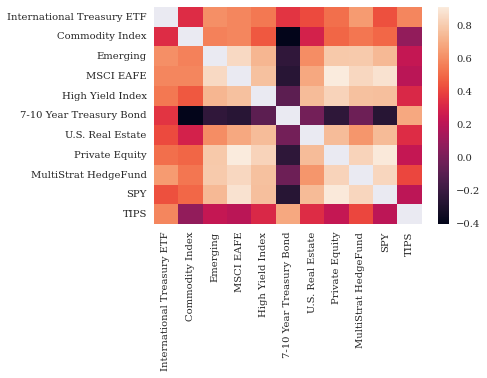

In [7]:
corr_mat = total_return.corr()
corr_mat[corr_mat == 1] = None
sns.heatmap(corr_mat)



In [8]:
corr_rank = pd.DataFrame(corr_mat.unstack().sort_values().dropna(), columns = ["Correlation"])
corr_rank

Correlation
7-10 Year Treasury Bond Commodity Index            -0.405431
Commodity Index         7-10 Year Treasury Bond    -0.405431
SPY                     7-10 Year Treasury Bond    -0.269163
7-10 Year Treasury Bond SPY                        -0.269163
MSCI EAFE               7-10 Year Treasury Bond    -0.264846
...                                                      ...
                        SPY                         0.874024
Private Equity          SPY                         0.903421
SPY                     Private Equity              0.903421
Private Equity          MSCI EAFE                   0.908746
MSCI EAFE               Private Equity              0.908746

[110 rows x 1 columns]

1. As you can see the pair that has the higest correlation is MSCI EAFE and Private Equity being $0.90987$. The pair that has the smallest correlation is the 7-10 Year Treasury Bond and Commodity Index with a correlation of $-.405431$. 

<AxesSubplot:title={'center':'Value of $1 Invested'}, xlabel='Date'>

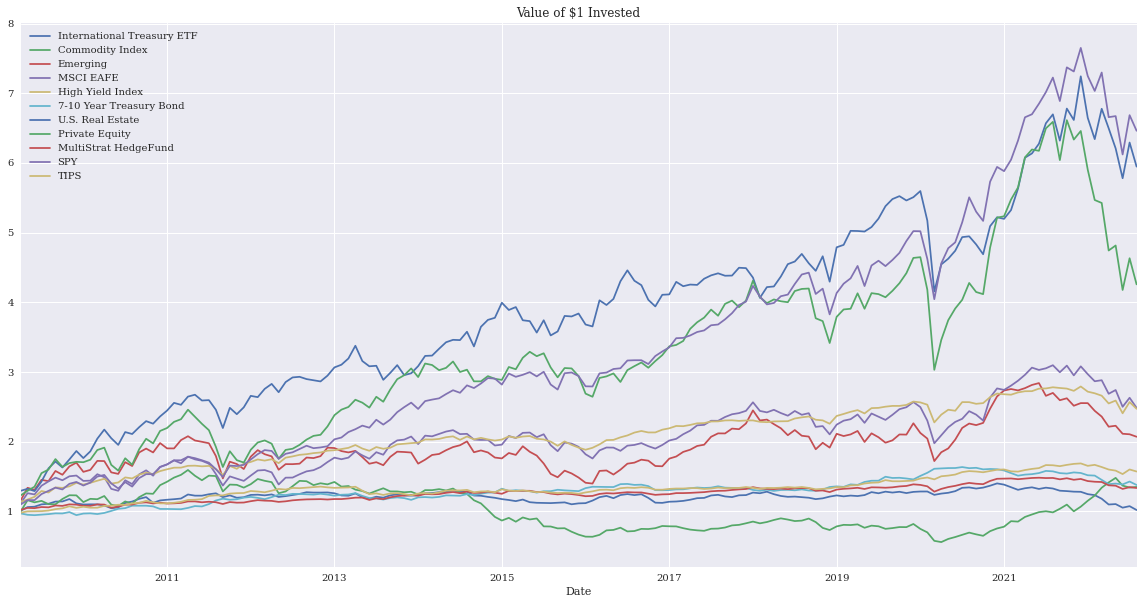

In [9]:

cum_returns = (total_return + 1).cumprod()
cum_returns.plot(figsize = (20,10), title = "Value of $1 Invested")

In [29]:
cum_returns[["International Treasury ETF","7-10 Year Treasury Bond","TIPS"]].tail(3)

,International Treasury ETF,7-10 Year Treasury Bond,TIPS
Date,,,
2022-06-30,1.054727,1.388467,1.536603
2022-07-31,1.076289,1.429586,1.602828
2022-08-31,1.021213,1.380211,1.573448


In [22]:
annualized_mean.loc[["International Treasury ETF", "7-10 Year Treasury Bond","TIPS"]].sort_values(by = "Sharpe Ratio")

,Annual Return,Volatility,Sharpe Ratio
International Treasury ETF,0.004653,0.078535,0.059248
7-10 Year Treasury Bond,0.025833,0.060077,0.429996
TIPS,0.034967,0.047833,0.731032



1. All in all *Treasury Inflation-Protected Securities* do not perform exceedingly well between 2010-2022, with an average annual return of around $3%$. Compared to the International Treasury ETF and the 7-10 Year Domestic Treasury performance, TIPS do outperform in all measures - cumulative returns, annualized returns, and have a higher sharpe ratio.

2. Based on the data, **TIPS** definitely expand the investment opportunity offering any portfolio a better risk-return profile. The reason why TIPS expand the investment opportunity set because traditional fixed income assets respond to unanticipated inflation with a declining price (because the **ytm increases**). In contrast, inflation indexed bonds respond to unancipated inflation with an increasing price since the principal is increases in proportion to inflation. When two assets respond in an opposite fashion to an important variable , it is important to categorize them in separate asset classes. 


- Yes, *Harvard* should consider **Treasury Inflation-Protected Securities as a separate asset class.**


## Question 3
1. Compute and display the weights of the tangency portfolios: $w^t$
2. Compute the mean, volatility, and sharpe ratio for the tangency portfolio corresponding to $w^t$.

In [11]:
def compute_tangency(df_tilde, diagonalize_Sigma=False):
    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))



    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.

    omega_tangency = pd.Series(weights, index=mu_tilde.index)

    return omega_tangency, mu_tilde, Sigma_adj


omega_tangency, mu_tilde, Sigma = compute_tangency(total_return)

omega_tangency.to_frame('Tangency Weights')

,Tangency Weights
International Treasury ETF,-1.335168
Commodity Index,0.239151
Emerging,0.339786
MSCI EAFE,-0.117068
High Yield Index,1.070489
7-10 Year Treasury Bond,2.457952
U.S. Real Estate,-0.307783
Private Equity,-0.513078
MultiStrat HedgeFund,-3.955222
SPY,2.430623


The weights above reflect the weights of the portfolio tangent to mean-volatitility frontier.

In [12]:
def portfolio_stats(omega, mu_tilde, Sigma, annualize_fac):
    # Mean
    mean = (mu_tilde @ omega) * annualize_fac

    # Volatility
    vol = np.sqrt(omega @ Sigma @ omega) * np.sqrt(annualize_fac)


    # Sharpe ratio
    sharpe_ratio = mean / vol

    return round(pd.DataFrame(data = [mean, vol, sharpe_ratio], 
                              index = ['Mean', 'Volatility', 'Sharpe'], 
                              columns = ['Portfolio Stats']), 4)

portfolio_stats(omega_tangency, mu_tilde, Sigma, 12)

,Portfolio Stats
Mean,0.3428
Volatility,0.1759
Sharpe,1.9493


The stats above reflect the mean, variance, and sharpe ratio of portfolio $w^t$ that is tangent to the mean-volatiltiy frontier. 

## Question 4 - The Allocation
Here I will calculate the optimized portfolio allocation with a target return of 1.5%.

In [105]:
def target_mv_portfolio(df_tilde,tangency_weights, target_return = 0.01):
    mu = df_tilde.mean()
    sigma_ = df_tilde.cov()
    sigma_inv = np.linalg.inv(sigma_)
    n = sigma_.shape[0]
    weight_v = (sigma_inv @ np.ones(n))/(np.ones(n) @ sigma_inv @ np.ones(n))
    weight_t =  tangency_weights
    omega = (target_return - mu.T@weight_v)/(mu.T@weight_t - mu.T@weight_v)
    omega_star = omega*weight_t + (1-omega)*weight_v
    return pd.Series(omega_star, index = mu_tilde.index)

optimized_portfolio = target_mv_portfolio(total_return,omega_tangency, target_return = 0.015)

In [106]:
optimized_portfolio

International Treasury ETF   -0.743896
Commodity Index               0.125074
Emerging                      0.140120
MSCI EAFE                    -0.043110
High Yield Index              0.606047
7-10 Year Treasury Bond       1.303991
U.S. Real Estate             -0.163098
Private Equity               -0.316038
MultiStrat HedgeFund         -1.545644
SPY                           1.210202
TIPS                          0.426352
dtype: float64

The weights above relfect the optimized asset allocation of the mean-variance portfolu with a targeted expected return of 1.5%

In [89]:
portfolio_stats(optimized_portfolio, mu_tilde,Sigma, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.0934
Sharpe,1.9271


The stats above refelect the mean, standard deviation, and sharpe ratio of the allocation weights $w^p$.

Discuss the allocation:

- The assets in which you are most long in are SPY and High Yield Bond Index. Some of the allocations are greater $|1|$, which is unrealistic since this would involve investing with a high degree of levarage. 
- The positions in which you are most short are BWX (SPDR Bloomberg International Treasury), Private Equity, and MultiQ Hedge Multi-Strategy Index. This involves taking **negative positions** by borrowing shares from prime broker an then immediately *selling* the asses with the intention of buying them back at a later date to profit from price declines. 

Does the $w^p$ allocation align with the assets that have the strongest Sharpe Ratios?

**Answer:** Yes, I the $w^p$ portfolio allocations do align with the sharpe ratios. As you can see below, we there is a positive correlation between sharpe ratio and asset allocation. Specifically the correlation is 0.42. All this means is that, generally, higher sharpe values tend to have *positive* allocations. SPY has a sharpe ratio of 1.03-so we can expect to see a postive allocation-with our data we have an allocation 1.21. For Multi-Strat Hedge, we have the largest negative allocation of -1.54. Althougth Multi-Strat Hedge doe not have the lowest sharpe, its asset class does not offer great risk-adjusted returns



In [90]:
print(annualized_mean)
print()
print(optimized_portfolio)


                            Annual Return  Volatility  Sharpe Ratio
International Treasury ETF       0.004653    0.078535      0.059248
Commodity Index                  0.038846    0.180186      0.215590
Emerging                         0.072621    0.191787      0.378655
MSCI EAFE                        0.081124    0.161885      0.501125
High Yield Index                 0.071588    0.089403      0.800730
7-10 Year Treasury Bond          0.025833    0.060077      0.429996
U.S. Real Estate                 0.150128    0.184407      0.814113
Private Equity                   0.133272    0.221299      0.602227
MultiStrat HedgeFund             0.022862    0.048879      0.467723
SPY                              0.150293    0.144811      1.037857
TIPS                             0.034967    0.047833      0.731032

International Treasury ETF   -0.743896
Commodity Index               0.125074
Emerging                      0.140120
MSCI EAFE                    -0.043110
High Yield Index           

In [91]:
np.corrcoef(annualized_mean["Sharpe Ratio"], optimized_portfolio)

array([[1.        , 0.44202232],
       [0.44202232, 1.        ]])

## Simple Portfolios

- A) Calculate the performance of an equally-weighted portfolio over the sample. Rescale the entire weighting vector to have a $u^p = 0.015$. Report its mean, volatility, and Sharpe ratio. 

In [93]:

equal_weights = np.repeat(1/11,11)
portfolio_stats(equal_weights,mu_tilde, Sigma,12)


,Portfolio Stats
Mean,0.0715
Volatility,0.0999
Sharpe,0.7152


In [94]:
target_return = 0.015
equal_weight_scaled = equal_weights *(target_return/(total_return.mean() @ equal_weights))
portfolio_stats(equal_weight_scaled, mu_tilde, Sigma, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.2517
Sharpe,0.7152


Calculating the performance of the risk parity portfolio with weights

- $w^i = \frac{1}{\sigma_i}$

In [95]:
w = 1/(total_return.std())
target_mean = 0.015
factor = 1/((w @ total_return.mean())/target_mean)
w = factor *w
pd.DataFrame(w, columns = ["Weights"])

,Weights
International Treasury ETF,0.379571
Commodity Index,0.165439
Emerging,0.155431
MSCI EAFE,0.184142
High Yield Index,0.333430
7-10 Year Treasury Bond,0.496193
U.S. Real Estate,0.161652
Private Equity,0.134704
MultiStrat HedgeFund,0.609866
SPY,0.205852


In [96]:
portfolio_stats(w, mu_tilde, Sigma, 12)

,Portfolio Stats
Mean,0.1800
Volatility,0.2356
Sharpe,0.7640


- How does this compare tothe MV portfolio from problem 2.4?

**Answer:**

- The *risk parity portfolio* is a lot more **inefficient** than the mean-variance portfolio calculated in 2.4. We see that both porfolios have the same expected return of 18%, however, the Mean-Variance porfolio lies on the efficient frontier, whereas the risk parity porfolio lies inside the efficient frontier. 
- In fact the sharpe ratio for the MV portfolio is 2.522 times greater than the risk parity porfolio. 


- It would be unwise to allocate according to the risk parity porfolio weights. 

## Question 6 (TIPS Affect on Sharpe Ratio)

- Assess the performance of the MV Portfolio if we drop TIPS from the investment set relative to the original MV porfolio statistics.

In [97]:
total_return_2 = total_return.drop(columns=["TIPS"])
sigma_2 = total_return_2.cov()
mu_tilde_2 = total_return_2.mean()
tangency_weights_no_TIP = compute_tangency(total_return_2)
pd.DataFrame(tangency_weights_no_TIP[0], columns = ["Weights"])

,Weights
International Treasury ETF,-1.425461
Commodity Index,0.310110
Emerging,0.392642
MSCI EAFE,-0.188777
High Yield Index,1.141159
7-10 Year Treasury Bond,3.154791
U.S. Real Estate,-0.315906
Private Equity,-0.524867
MultiStrat HedgeFund,-4.217960
SPY,2.674270


In [107]:
optimized_no_Tip = target_mv_portfolio(total_return_2, tangency_weights_no_TIP[0], 0.15)
optimized_no_Tip

International Treasury ETF    -6.593024
Commodity Index                1.476158
Emerging                       2.208290
MSCI EAFE                     -1.025909
High Yield Index               5.199447
7-10 Year Treasury Bond       14.883973
U.S. Real Estate              -1.536302
Private Equity                -2.189155
MultiStrat HedgeFund         -24.944752
SPY                           13.521275
TIPS                                NaN
dtype: float64

AttributeError: 'float' object has no attribute 'dropna'